In [ ]:
import pandas as pd

df = pd.read_csv('data/data_pegawai_hr_project.csv')

df.head()

: 

In [4]:
print(df['Status'].value_counts())

Status
Aktif     74
Resign    26
Name: count, dtype: int64


In [8]:
###mengubah kolom tanggal
df['Tanggal Masuk'] = pd.to_datetime(df['Tanggal Masuk'])
df['Tanggal Resign'] = pd.to_datetime(df['Tanggal Resign'], errors='coerce')


### mengubah status menjadi 0 untuk aktif dan 1 untuk resign
df['Status_num'] = df['Status'].map({'Aktif':0, 'Resign':1})

### cek hasil
print(df[['Status','Status_num']].head())

   Status  Status_num
0   Aktif           0
1   Aktif           0
2   Aktif           0
3   Aktif           0
4  Resign           1


In [9]:

from deep_translator import GoogleTranslator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [10]:
analyzer = SentimentIntensityAnalyzer()

def translate_feedback(text):
  return GoogleTranslator(source='auto', target='en').translate(text)


def get_vader_sentiment(feedback):
  english_text = translate_feedback(feedback)
  sentiment = analyzer.polarity_scores(english_text)
  if sentiment['compound'] >= 0.05:
    return 'Positif'
  elif sentiment['compound'] <= -0.05:
    return 'Negatif'
  else:
    return 'Netral'

In [11]:
df_cleaned = df[~df['Feedback'].str.match(r'^[.,\s]*$')]

In [12]:
df_cleaned.head()

,Nama Pegawai,Gender,Tanggal Masuk,Tanggal Resign,Status,Department,Jabatan,Performance (1-5),Jumlah Promosi,Feedback,Status_num
0,Steven Reid,Laki-laki,2023-07-05,NaT,Aktif,Finance,Senior Staff,1,2,Terlalu banyak tekanan kerja tanpa apresiasi.,0
1,Sandra Johnson,Laki-laki,2024-03-08,NaT,Aktif,HR,Senior Staff,1,0,Saya sangat senang bekerja di sini.,0
2,Cassandra Anderson,Perempuan,2023-08-12,NaT,Aktif,Finance,Manager,5,3,Terlalu banyak tekanan kerja tanpa apresiasi.,0
3,Nicholas Smith,Laki-laki,2020-12-01,NaT,Aktif,IT,Supervisor,2,3,Saya merasa dihargai atas kerja keras saya.,0
4,Jennifer Walton,Perempuan,2023-01-07,2024-04-05,Resign,IT,Supervisor,4,0,Lingkungan kerja tidak mendukung perkembangan.,1


In [13]:
df_cleaned['Sentimen'] = df_cleaned['Feedback'].apply(get_vader_sentiment)
df_cleaned.head()

,Nama Pegawai,Gender,Tanggal Masuk,Tanggal Resign,Status,Department,Jabatan,Performance (1-5),Jumlah Promosi,Feedback,Status_num,Sentimen
0,Steven Reid,Laki-laki,2023-07-05,NaT,Aktif,Finance,Senior Staff,1,2,Terlalu banyak tekanan kerja tanpa apresiasi.,0,Negatif
1,Sandra Johnson,Laki-laki,2024-03-08,NaT,Aktif,HR,Senior Staff,1,0,Saya sangat senang bekerja di sini.,0,Positif
2,Cassandra Anderson,Perempuan,2023-08-12,NaT,Aktif,Finance,Manager,5,3,Terlalu banyak tekanan kerja tanpa apresiasi.,0,Negatif
3,Nicholas Smith,Laki-laki,2020-12-01,NaT,Aktif,IT,Supervisor,2,3,Saya merasa dihargai atas kerja keras saya.,0,Positif
4,Jennifer Walton,Perempuan,2023-01-07,2024-04-05,Resign,IT,Supervisor,4,0,Lingkungan kerja tidak mendukung perkembangan.,1,Negatif


In [15]:
### mengubah sentimen menjadi 0 untuk Positif dan 1 untuk Negatif
df_cleaned['Sentimen_num'] = df_cleaned['Sentimen'].map({'Positif':0, 'Negatif':1})

In [16]:
df_cleaned.head()

,Nama Pegawai,Gender,Tanggal Masuk,Tanggal Resign,Status,Department,Jabatan,Performance (1-5),Jumlah Promosi,Feedback,Status_num,Sentimen,Sentimen_num
0,Steven Reid,Laki-laki,2023-07-05,NaT,Aktif,Finance,Senior Staff,1,2,Terlalu banyak tekanan kerja tanpa apresiasi.,0,Negatif,1
1,Sandra Johnson,Laki-laki,2024-03-08,NaT,Aktif,HR,Senior Staff,1,0,Saya sangat senang bekerja di sini.,0,Positif,0
2,Cassandra Anderson,Perempuan,2023-08-12,NaT,Aktif,Finance,Manager,5,3,Terlalu banyak tekanan kerja tanpa apresiasi.,0,Negatif,1
3,Nicholas Smith,Laki-laki,2020-12-01,NaT,Aktif,IT,Supervisor,2,3,Saya merasa dihargai atas kerja keras saya.,0,Positif,0
4,Jennifer Walton,Perempuan,2023-01-07,2024-04-05,Resign,IT,Supervisor,4,0,Lingkungan kerja tidak mendukung perkembangan.,1,Negatif,1


df_new = (df[['Nama Pegawai','Gender','Status_num','Jabatan','Performance (1-5)','Jumlah Promosi','Sentimen_num']])

In [19]:
df_new = (df_cleaned[['Nama Pegawai','Gender','Status_num','Jabatan','Performance (1-5)','Jumlah Promosi','Sentimen_num']])
df_new.head()

,Nama Pegawai,Gender,Status_num,Jabatan,Performance (1-5),Jumlah Promosi,Sentimen_num
0,Steven Reid,Laki-laki,0,Senior Staff,1,2,1
1,Sandra Johnson,Laki-laki,0,Senior Staff,1,0,0
2,Cassandra Anderson,Perempuan,0,Manager,5,3,1
3,Nicholas Smith,Laki-laki,0,Supervisor,2,3,0
4,Jennifer Walton,Perempuan,1,Supervisor,4,0,1


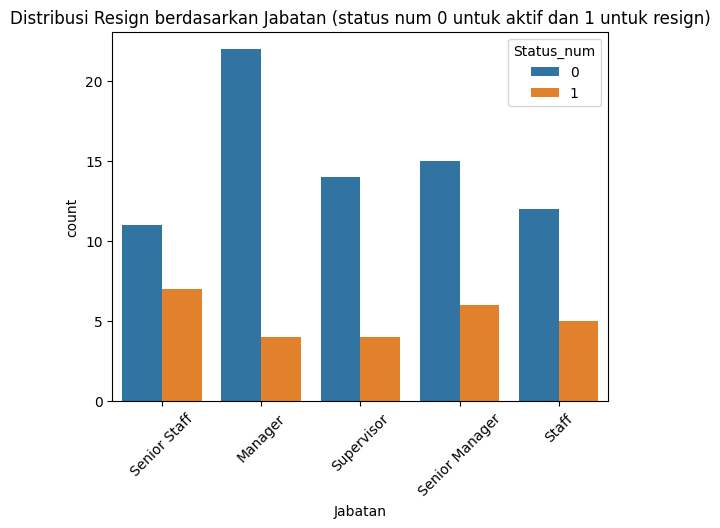

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_new, x='Jabatan',hue='Status_num')
plt.title("Distribusi Resign berdasarkan Jabatan (status num 0 untuk aktif dan 1 untuk resign)")
plt.xticks(rotation=45)
plt.show()

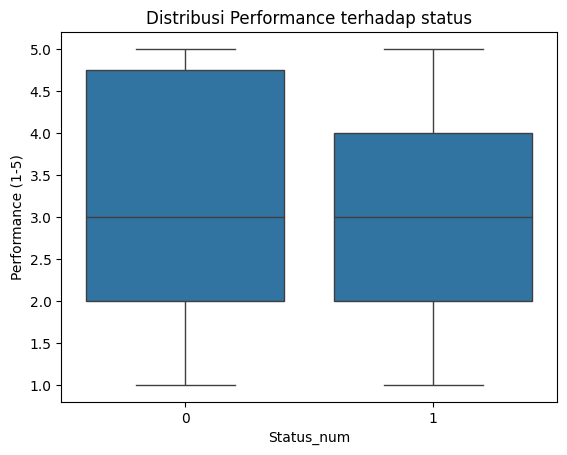

In [25]:
sns.boxplot(data=df_new, x='Status_num', y='Performance (1-5)')
plt.title("Distribusi Performance terhadap status")
plt.show()

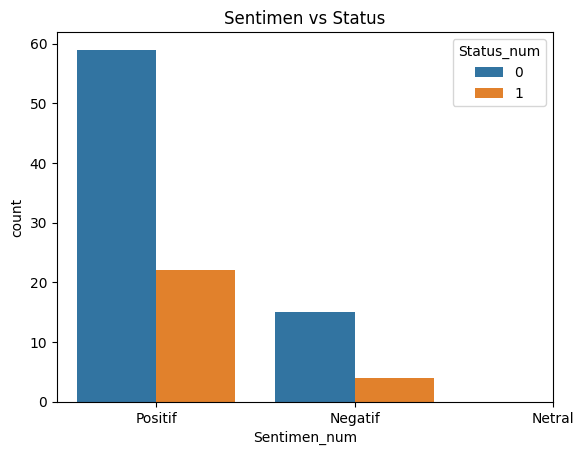

In [27]:
sns.countplot(data=df_new, x='Sentimen_num',hue='Status_num')
plt.title("Sentimen vs Status")
plt.xticks([0,1,2], ['Positif','Negatif','Netral'])
plt.show()

In [30]:
df_new.count()

Nama Pegawai         100
Gender               100
Status_num           100
Jabatan              100
Performance (1-5)    100
Jumlah Promosi       100
Sentimen_num         100
dtype: int64

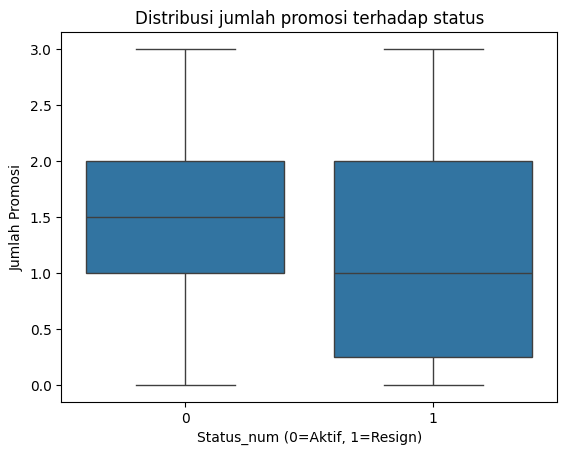

In [31]:
###menngetahui promosi vs status
sns.boxplot(x='Status_num', y='Jumlah Promosi', data=df_new)
plt.title('Distribusi jumlah promosi terhadap status')
plt.xlabel('Status_num (0=Aktif, 1=Resign)')
plt.ylabel('Jumlah Promosi')
plt.show()

In [32]:
### mengubah sentimen menjadi 0 untuk Positif dan 1 untuk Negatif
df_new['Sentimen_num'] = df_new['Sentimen'].map({'Positif':0, 'Negatif':1,'Netral':2})
df_new

KeyError: 'Sentimen'